In [79]:
from database.adatabase import ADatabase
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
sapling = ADatabase("sapling")

In [81]:
sapling.connect()
trades = sapling.retrieve("positions")
sapling.disconnect()

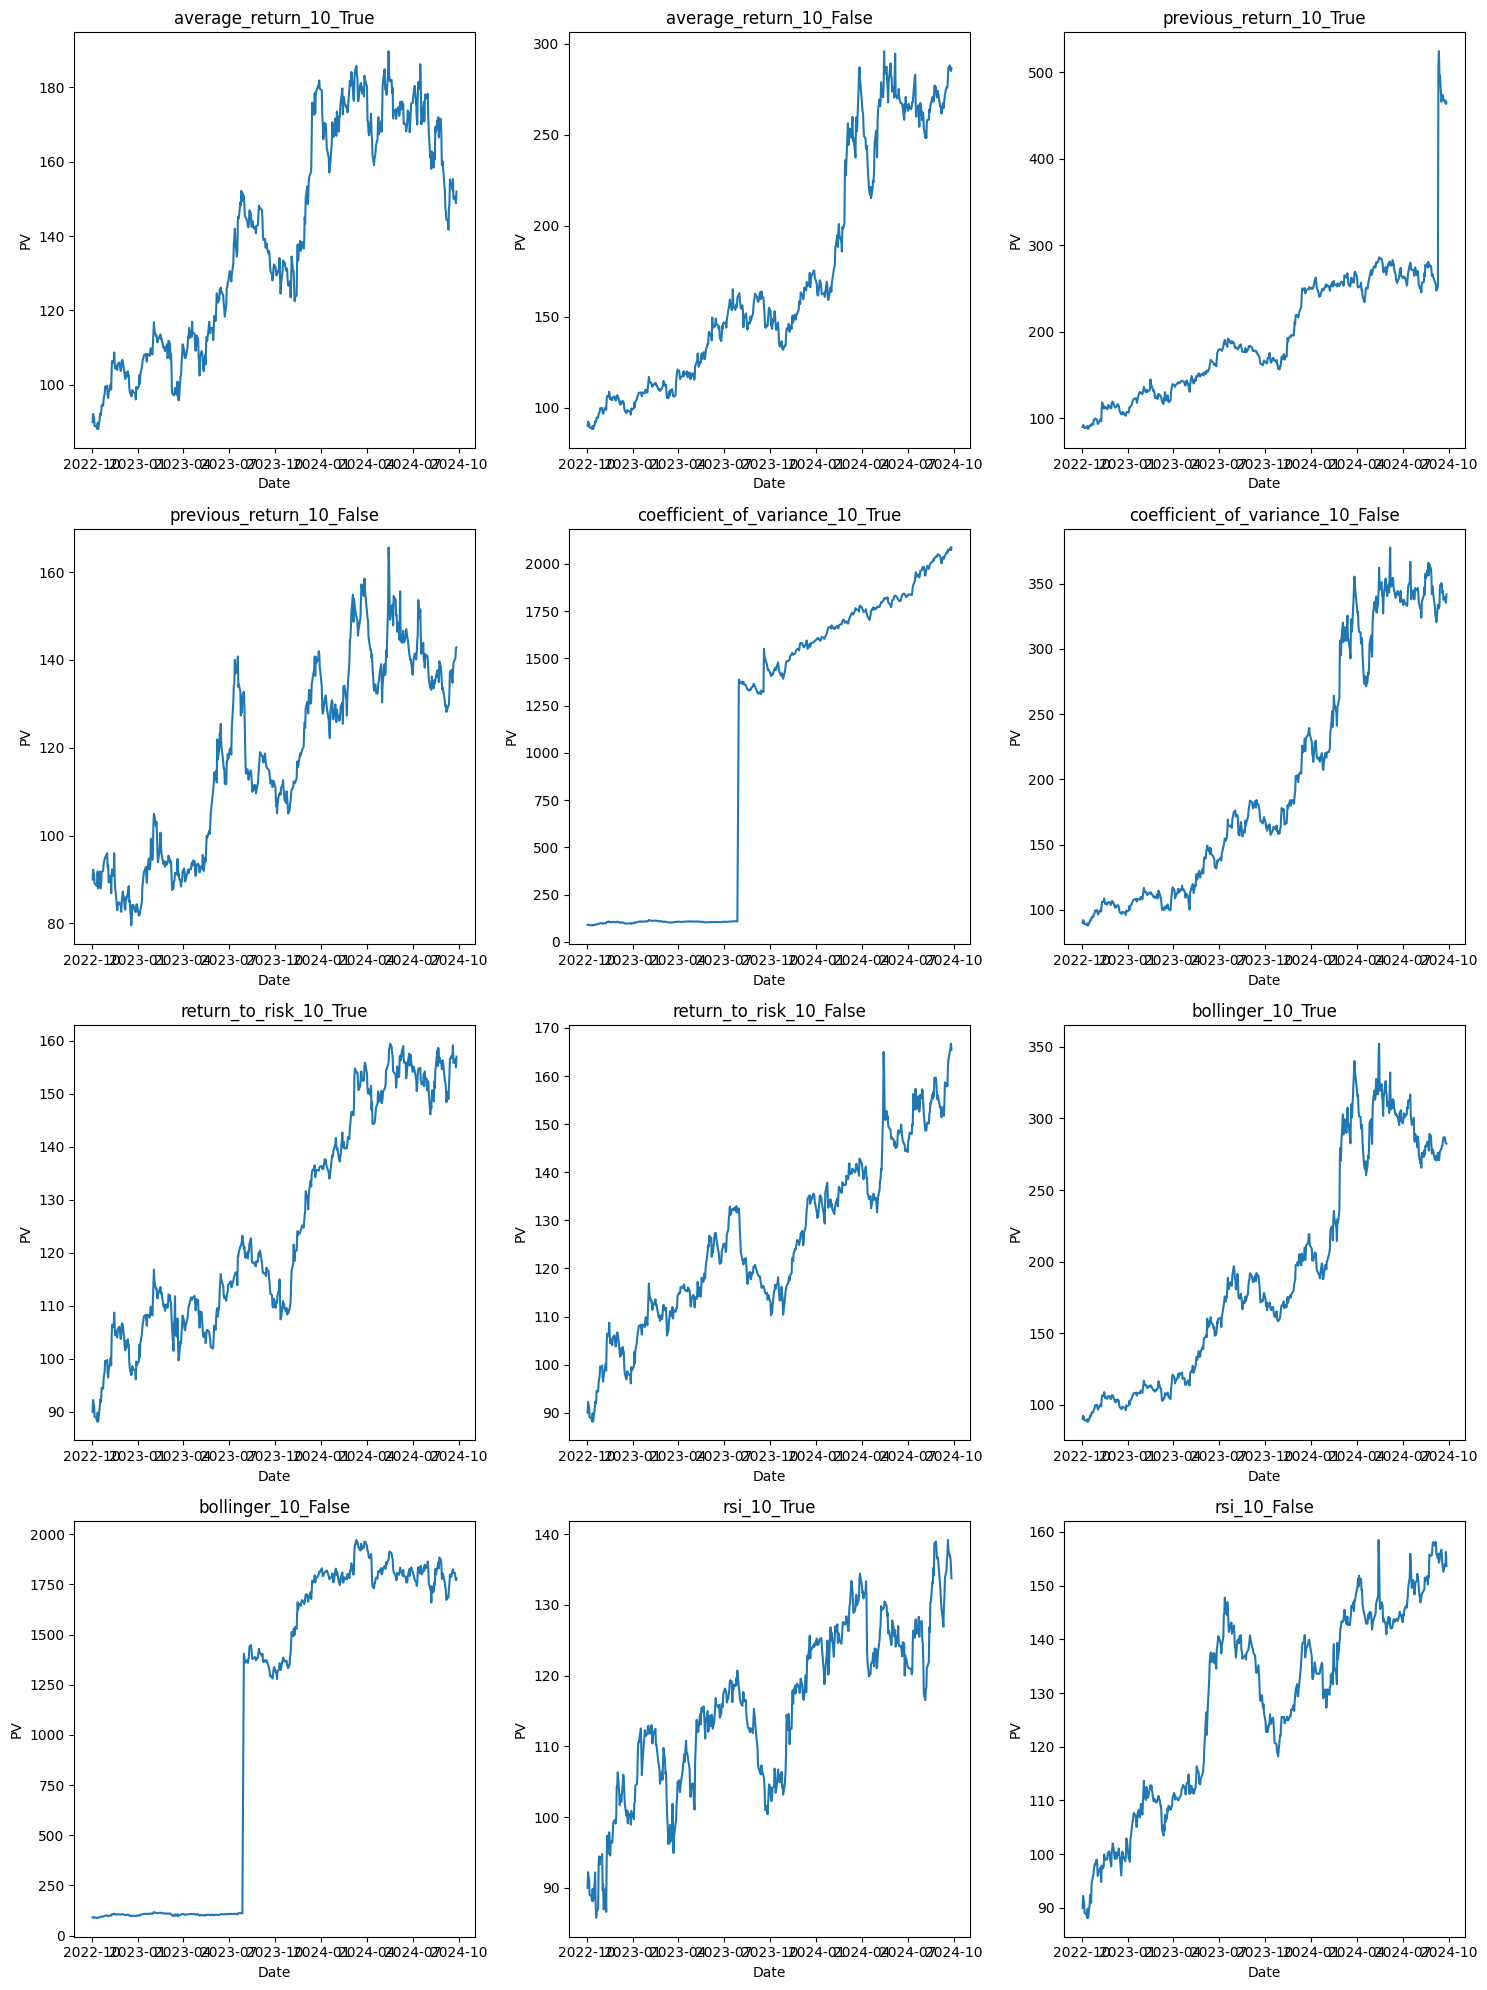

In [82]:
analysis = []

# Assuming trades DataFrame is already defined
trades["pv"] = trades["adjclose"] * trades["quantity"]

# Get unique values
names = trades["name"].unique()
positions = [10]
booleans = [True, False]

# Calculate the number of plots
num_plots = len(names) * len(positions) * len(booleans)
num_columns = 3
num_rows = -(-num_plots // num_columns)  # Ceiling division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier indexing
axes = axes.flatten()

plot_index = 0
for name in names:
    for position in positions:
        for boolean in booleans:
            portfolio = trades.pivot_table(index=["date", "name", "positions", "boolean"], 
                                           columns="position", values="pv").reset_index()
            portfolio = portfolio[(portfolio["name"] == name) & 
                                  (portfolio["positions"] == position) & 
                                  (portfolio["boolean"] == boolean)]
            if position == 1:
                portfolio["pv"] = portfolio[0]
            else:
                portfolio["pv"] = [sum([row[1][i] for i in range(trades["position"].max())]) 
                                   for row in portfolio.iterrows()]
            stuff = {}
            stuff["name"] = name
            stuff["position"] = position
            stuff["boolean"] = boolean
            stuff["pv"] = portfolio["pv"].iloc[-1].item()
            stuff["std"] = portfolio["pv"].std()
            analysis.append(stuff)
            # Plotting
            ax = axes[plot_index]
            ax.plot(portfolio["date"].values, portfolio["pv"].values)
            ax.set_title(f"{name}_{position}_{boolean}")
            ax.set_xlabel('Date')
            ax.set_ylabel('PV')
            
            plot_index += 1

# Hide any unused axes
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [83]:
a = pd.DataFrame(analysis)
a["risk_to_return"] = a["pv"] / a["std"]
a.sort_values("pv",ascending=False)

,name,position,boolean,pv,std,risk_to_return
4,coefficient_of_variance,10,True,2087.015785,795.202027,2.624510
9,bollinger,10,False,1780.488207,797.219903,2.233371
2,previous_return,10,True,465.080441,76.395723,6.087781
5,coefficient_of_variance,10,False,341.782027,93.340230,3.661680
1,average_return,10,False,286.541614,63.689522,4.499039
8,bollinger,10,True,282.370202,76.300422,3.700769
7,return_to_risk,10,False,165.454679,17.878276,9.254510
6,return_to_risk,10,True,157.049936,20.833326,7.538400
11,rsi,10,False,153.705663,18.560261,8.281439
0,average_return,10,True,151.946337,29.593923,5.134376


In [84]:
trade_analysis = trades[(trades["name"]=="coefficient_of_variance") & (trades["positions"]==10) & (trades["boolean"]==False)]
trade_analysis["return"] = (trade_analysis["adjclose"] - trade_analysis["buy_price"]) / trade_analysis["buy_price"]

C:\Users\eric\AppData\Local\Temp\ipykernel_15520\3748924737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_analysis["return"] = (trade_analysis["adjclose"] - trade_analysis["buy_price"]) / trade_analysis["buy_price"]


In [85]:
trade_analysis.sort_values("return",ascending=False)

,side,type,time_in_force,symbol,notional,adjclose,quantity,buy_date,buy_price,date,position,name,positions,boolean,pv,return
28472,buy,market,day,VKTX,29.16,94.50,0.757796,2024-02-26,38.48,2024-02-28,2,coefficient_of_variance,10,False,71.611746,1.455821
28492,buy,market,day,VKTX,29.16,85.22,0.757796,2024-02-26,38.48,2024-03-01,2,coefficient_of_variance,10,False,64.579397,1.214657
28462,buy,market,day,VKTX,29.16,85.05,0.757796,2024-02-26,38.48,2024-02-27,2,coefficient_of_variance,10,False,64.450572,1.210239
28482,buy,market,day,VKTX,29.16,77.05,0.757796,2024-02-26,38.48,2024-02-29,2,coefficient_of_variance,10,False,58.388202,1.002339
26182,buy,market,day,VKTX,11.08,17.33,1.214912,2023-03-27,9.12,2023-03-30,2,coefficient_of_variance,10,False,21.054430,0.900219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29768,buy,market,day,WOLF,40.17,9.11,3.011244,2024-08-26,13.34,2024-09-03,8,coefficient_of_variance,10,False,27.432436,-0.317091
29788,buy,market,day,WOLF,40.17,8.80,3.011244,2024-08-26,13.34,2024-09-05,8,coefficient_of_variance,10,False,26.498951,-0.340330
27050,buy,market,day,SN,19.47,26.30,0.470745,2023-07-31,41.36,2023-08-04,0,coefficient_of_variance,10,False,12.380585,-0.364120
29798,buy,market,day,WOLF,40.17,8.23,3.011244,2024-08-26,13.34,2024-09-06,8,coefficient_of_variance,10,False,24.782541,-0.383058
